Se tiene planeado hacer un modelo ARIMA por tienda para hacer estimaciones de las ventas y analizar si alguna de ellas presenta estimaciones a la alza que destaquen de las demas, sin embargo, como se menciono en la notebook anterior se puede notar que las ventas parecieran presentar ruido blanco, de ser el caso se implementara cierto juicio para tomar una decision en base a las ventas.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('once')

# Datos

In [24]:
T1 = 'data_resul\serie_temporalsemanal_tienda_1.csv'
T2 = 'data_resul\serie_temporalsemanal_tienda_2.csv'
T3 = 'data_resul\serie_temporalsemanal_tienda_3.csv'
T4 = 'data_resul\serie_temporalsemanal_tienda_4.csv'

Tienda1 = pd.read_csv(T1)
Tienda2 = pd.read_csv(T2)
Tienda3 = pd.read_csv(T3)
Tienda4 = pd.read_csv(T4)

<>:1: DeprecationWarning: invalid escape sequence '\s'


In [25]:
Tienda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   semana           170 non-null    object 
 1   Ventas_Millones  170 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [26]:
Tienda1.head()

,semana,Ventas_Millones
0,2019-12-30,5.8720
1,2020-01-06,7.0340
2,2020-01-13,9.3170
3,2020-01-20,5.4550
4,2020-01-27,7.1425


In [27]:
df = [Tienda1,Tienda2,Tienda3,Tienda4]

df = [
    tienda
    .rename(columns={'semana': 'date'})
    .assign(date=lambda x: pd.to_datetime(x['date'], format='%Y-%m-%d'))
    .set_index('date')
    .asfreq('W-MON')
    ['Ventas_Millones'] 
    for tienda in df
]


In [28]:
#Dividimos entrenamiento prueba
Train = [tienda.iloc[:-30] for tienda in df]
Test = [tienda.iloc[-30:] for tienda in df]

In [ ]:
class PlotSerie:
    """
    Clase para generar, mostrar y guardar graficos comparativos de series temporales.
    
    Diseñada para visualizar particiones train/test en analisis de ventas por tienda,
    facilitando la evaluación visual de modelos predictivos y patrones temporales.
    """
    
    def __init__(self, train, test, tienda, show=True):
        """
        Inicializa el plotter de series temporales.
        
        Parameters
        ----------
        train : pandas.Series
            Serie temporal con datos de entrenamiento.
        test : pandas.Series
            Serie temporal con datos de prueba.
        tienda : int or str
            Identificador de la tienda para etiquetado del gráfico.
        show : bool, optional
            Si es True, muestra el gráfico automáticamente (por defecto True).
        """
        self.fig = None          # Figura de matplotlib
        self.ax = None           # Ejes de matplotlib
        self.plotted = False     # Estado del gráfico
        self.train = train       # Datos de entrenamiento
        self.test = test         # Datos de prueba
        self.tienda = tienda     # Identificador de tienda
    
    def plot(self):
        """
        Genera el gráfico comparativo train vs test.
        
        Returns
        -------
        self
            Permite encadenamiento de metodos (method chaining).
        """
        self.fig, self.ax = plt.subplots(figsize=(7, 3))

        # Plot series temporales
        self.train.plot(ax=self.ax, label='Train')
        self.test.plot(ax=self.ax, label='Test')

        # Configuración visual
        self.ax.set_title(f'Venta semanal - Tienda {self.tienda} (Millones)')
        self.ax.set_xlabel('Fecha')
        self.ax.set_ylabel('Ventas')
        self.ax.grid(True)
        self.ax.legend()

        plt.tight_layout()
        self.plotted = True  # Marcar como graficado
        return self
    
    def show(self):
        """
        Muestra el grafico si ha sido generado previamente.
        
        Returns
        -------
        self
            Permite encadenamiento de metodos.
        """
        if self.plotted and self.fig is not None:
            plt.show()
        else:
            print("Primero debe llamar al metodo plot()")
        return self
    
    def save(self, filename):
        """
        Guarda el grafico en un archivo de imagen.
        
        Parameters
        ----------
        filename : str
            Ruta y nombre del archivo para guardar (ej: 'tienda1_ventas.png').
            
        Returns
        -------
        self
            Permite encadenamiento de metodos.
        """
        if self.plotted and self.fig is not None:
            self.fig.savefig(filename)
            print(f"Grafico guardado como {filename}")
        return self

In [30]:
warnings.filterwarnings("ignore")

plotters ={}

for i, (tr, ts) in enumerate(zip(Train, Test), 1):
    plotter = PlotSerie(tr, ts, tienda=i,show=False)
    plotters[f'tienda_{i}'] = plotter


# Análisis de las series temporales.

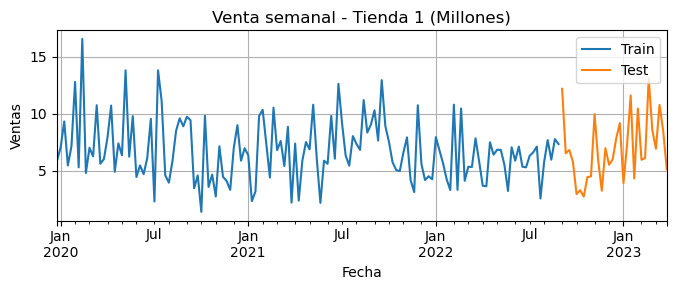

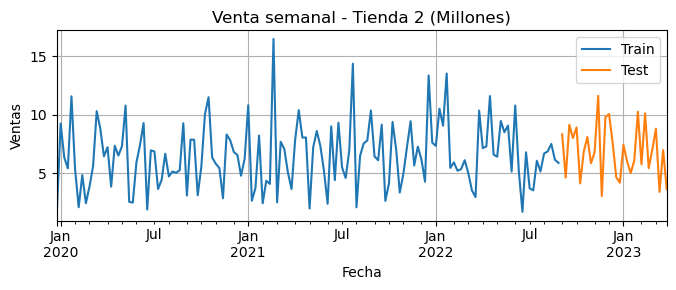

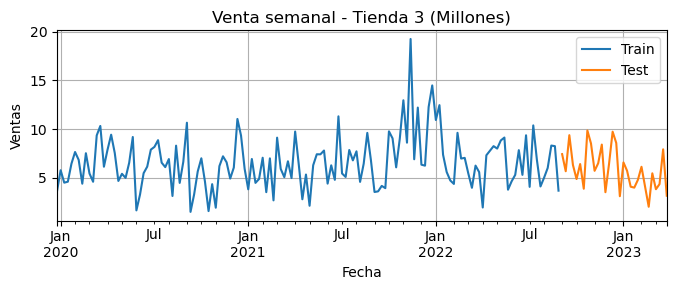

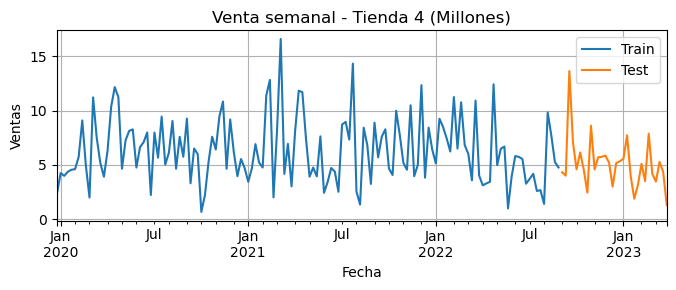

In [31]:
for i in range(1,5):
    plotters[f'tienda_{i}'].plot().show()

## Estacionariedad.

In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [33]:
def test_estacion(x):
    adfuller_result = adfuller(x)
    kpss_result = kpss(x)
    print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
    print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

In [34]:
warnings.simplefilter("ignore")
for i,x in enumerate(Train,1):

    print('='*25 + f'Test Estacionariedad - Tienda {i}' + '='*25)
    test_estacion(x)
    print('\n')

=========================Test Estacionariedad - Tienda 1=========================
ADF Statistic: -11.91133588573441, p-value: 5.287967662607511e-22
KPSS Statistic: 0.38025884153528544, p-value: 0.08566429244168731


=========================Test Estacionariedad - Tienda 2=========================
ADF Statistic: -12.588085159488546, p-value: 1.8468856024965517e-23
KPSS Statistic: 0.2603283403191117, p-value: 0.1


=========================Test Estacionariedad - Tienda 3=========================
ADF Statistic: -6.16109604135947, p-value: 7.170927628735895e-08
KPSS Statistic: 0.36991019874792846, p-value: 0.09012491433278945


=========================Test Estacionariedad - Tienda 4=========================
ADF Statistic: -11.008679907072834, p-value: 6.406956862544207e-20
KPSS Statistic: 0.14241733436750686, p-value: 0.1




Debido a que las cuatros series cumplen el siguiente criterio de prueba:
- ADF:   p-value < 0.05  (Serie estacionaria)
- KPSS:  p-value ≥ 0.05  (Serie estacionaria)

Las cuatro Tiendas son Estacionarias.

## Análisis de autocorrelación

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
def plot_autocorr(x,i):

    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(x, ax=ax, lags=50, alpha=0.05)
    ax.set_title(f'Función de Autocorrelación (ACF) - Serie Original- Tienda {i}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Autocorrelación')
    ax.set_xlabel('Lag')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

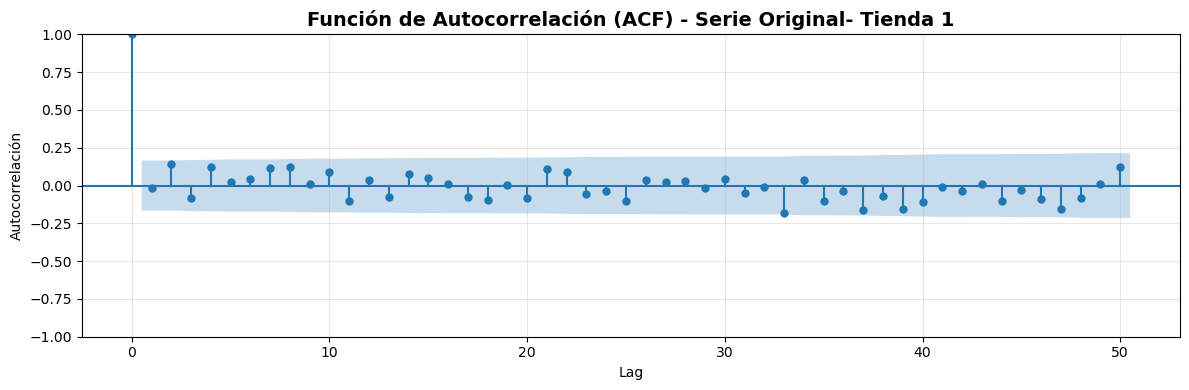

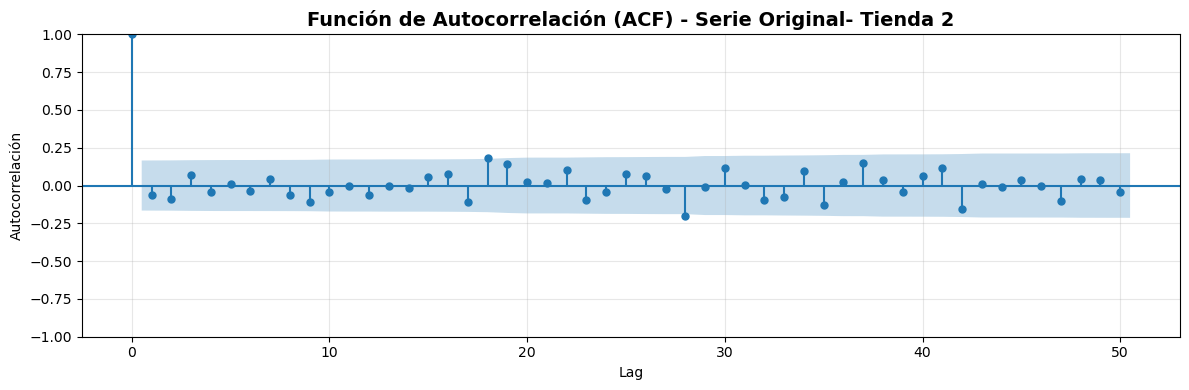

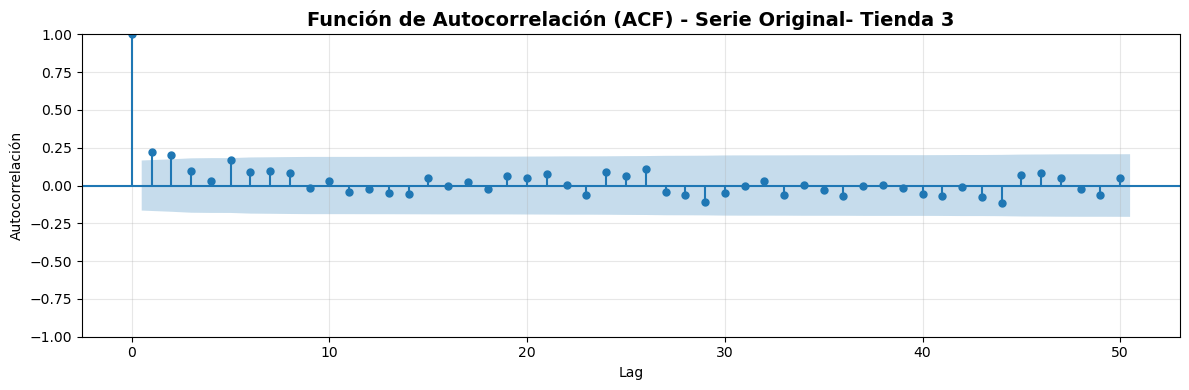

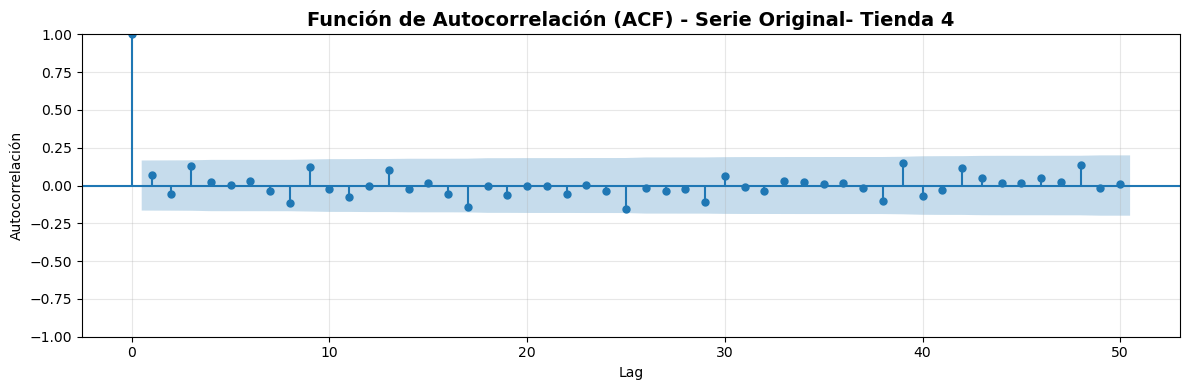

In [37]:
warnings.simplefilter("ignore")
for i,x in enumerate(Train,1):

    plot_autocorr(x,i)
    

Se puede notar que los lags disminuyen abruptamente alrededor del 0 despues del lag 0 lo que indica que existe ruido blanco, a continuacion desarrollaremos la prueba estadistica correspondiente para probar esta primera impresión.

## Prueba de Ruido Blanco
### Prueba Ljung-Box

In [38]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_ruido_blanco(serie, lags=20):
    """
    Prueba de Ljung-Box para ruido blanco
    """
    resultado = acorr_ljungbox(serie, lags=lags, return_df=True)
    
    print("Prueba Ljung-Box para Ruido Blanco:")
    print(f"Estadístico: {resultado['lb_stat'].iloc[-1]:.4f}")
    print(f"p-value: {resultado['lb_pvalue'].iloc[-1]:.4f}")
    
    if resultado['lb_pvalue'].iloc[-1] > 0.05:
        print(" No se rechaza H0: La serie parece ruido blanco")
    else:
        print(" Se rechaza H0: La serie NO es ruido blanco")
    
    return resultado

In [39]:
for i,x in enumerate(Train,1):
    print('='*25 + f'Tienda{i}' + '='*25)
    test_ruido_blanco(x)

=========================Tienda1=========================
Prueba Ljung-Box para Ruido Blanco:
Estadístico: 19.4224
p-value: 0.4945
 No se rechaza H0: La serie parece ruido blanco
=========================Tienda2=========================
Prueba Ljung-Box para Ruido Blanco:
Estadístico: 19.0875
p-value: 0.5161
 No se rechaza H0: La serie parece ruido blanco
=========================Tienda3=========================
Prueba Ljung-Box para Ruido Blanco:
Estadístico: 25.2750
p-value: 0.1911
 No se rechaza H0: La serie parece ruido blanco
=========================Tienda4=========================
Prueba Ljung-Box para Ruido Blanco:
Estadístico: 15.3273
p-value: 0.7574
 No se rechaza H0: La serie parece ruido blanco


Como era de esperarse la serie presenta ruido blanco, asi que implementaremos un criterio que nos ayude a tomar una decision en base a las ventas semanales para evaluar las ventas de las tiendas.

# Evaluación de ventas
Haremos lo siguiente:
- Tomaremos la venta semanal minima y maxima de la serie de tiempo (segun el analisis cuartilico para ignorar valores atipicos)
- Definiremos un espectro por encima y por debajo de estos valores
- Contaremos a lo largo de la serie de tiempo cuantas ventas semanales entran dentro del espectro
- Compararemos el numero de puntos muestrales dentro de los rangos ademas del valor minimo y maximo de las series.

In [ ]:
def analizar_intervalos(x, n=1):
    """
    Analiza intervalos de una serie temporal usando estadisticas descriptivas.
    
    Calcula intervalos de referencia basados en bigotes reales (IQR method) y 
    desviacion estandar, identificando puntos altos y bajos para analisis de outliers
    y comportamiento extremo en series temporales.

    Parameters
    ----------
    x : pandas.Series
        Serie temporal a analizar.
    n : int, optional
        Multiplicador de desviacion estandar para definir intervalos (default=1).

    Returns
    -------
    tuple
        (resumen_df, (puntos_altos, puntos_bajos), 
         (lim_sup_intervalo, bigote_sup), 
         (bigote_inf, lim_inf_intervalo), 
         n_std)
        
        - resumen_df: DataFrame con estadisticas clave
        - puntos_altos: puntos en intervalo superior
        - puntos_bajos: puntos en intervalo inferior
        - limites_intervalos: tuplas con limites calculados
        - n_std: valor de desviacion estandar multiplicado por n
    """
    # Desviacion estandar
    std = x.std()

    # Calculo de cuartiles y rango intercuartil (IQR)
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1

    # Limites teoricos de bigotes (metodo IQR)
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    # Bigotes reales (valores mas extremos dentro de los limites teoricos)
    bigote_sup = x[x <= limite_sup].max() 
    bigote_inf = x[x >= limite_inf].min()
    
    # Definir limites de intervalos usando desviacion estandar
    limite_superior = bigote_sup - n*std  # Punto de corte inferior para intervalo alto
    limite_inferior = bigote_inf + n*std  # Punto de corte superior para intervalo bajo
    
    # Filtrar puntos en los intervalos definidos
    puntos_altos = x[x >= limite_superior]  # Puntos en el n*std superior
    puntos_bajos = x[x <= limite_inferior]  # Puntos en el n*std inferior
    
    # Calcular estadisticas descriptivas
    total_puntos = len(x)
    
    # Construir resumen estructurado
    resultado = {
        'Max': f'{x.max():.3f}',
        'Min': f'{x.min():.3f}',
        'Intervalo_maximo': f'[{round(limite_superior, 3):.3f},{round(bigote_sup, 3):.3f}]',  
        'Intervalo_minimo': f'[{round(bigote_inf, 3):.3f},{round(limite_inferior, 3):.3f}]',
        'puntos_altos': int(len(puntos_altos)),
        'puntos_bajos': int(len(puntos_bajos)),
        'porcentaje_altos': f"{(len(puntos_altos) / total_puntos):.1%}",
        'porcentaje_bajos': f"{(len(puntos_bajos) / total_puntos):.1%}"
    }
    
    return (pd.DataFrame(list(resultado.items()), columns=['Variable', 'Valor']),
            (puntos_altos, puntos_bajos),
            (limite_superior, bigote_sup),
            (bigote_inf, limite_inferior), 
            n*std)

In [90]:
desviaciones = 1.5

for i,tienda in enumerate(df,1):
    print('='*15 + f' Tienda {i} | desviaciones = {desviaciones} '+'='*10)
    resumen,pts,altos,bajos,nstd = analizar_intervalos(tienda,n= desviaciones)
    print(resumen)
    

=============== Tienda 1 | desviaciones = 1.5 ==========
           Variable           Valor
0               Max          16.563
1               Min           1.373
2  Intervalo_maximo  [9.018,13.102]
3  Intervalo_minimo   [1.373,5.457]
4      puntos_altos              35
5      puntos_bajos              54
6  porcentaje_altos           20.6%
7  porcentaje_bajos           31.8%
=============== Tienda 2 | desviaciones = 1.5 ==========
           Variable           Valor
0               Max          16.464
1               Min           1.681
2  Intervalo_maximo  [7.587,11.608]
3  Intervalo_minimo   [1.681,5.702]
4      puntos_altos              53
5      puntos_bajos              66
6  porcentaje_altos           31.2%
7  porcentaje_bajos           38.8%
=============== Tienda 3 | desviaciones = 1.5 ==========
           Variable           Valor
0               Max          19.244
1               Min           1.502
2  Intervalo_maximo  [8.540,12.455]
3  Intervalo_minimo   [1.502,5.417]
4

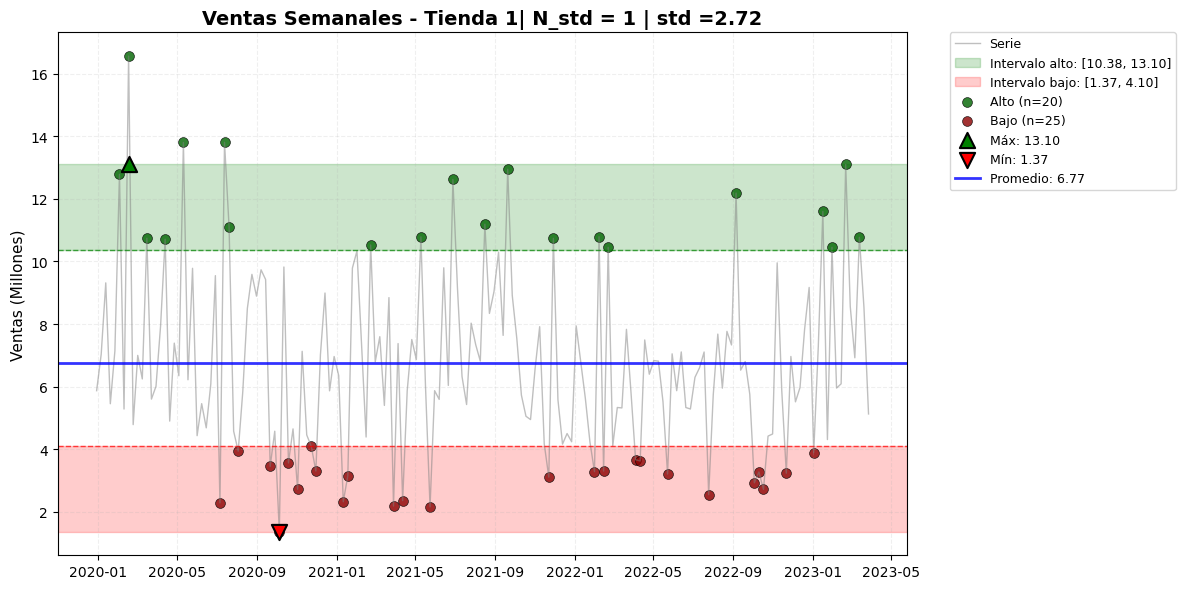

In [99]:
# Obtener los resultados
tienda = 0
desviaciones = 1

df_resumen, (puntos_altos, puntos_bajos), (lim_sup, max_val), (min_val, lim_inf), nstd = analizar_intervalos(df[tienda], n=desviaciones)

fig, ax = plt.subplots(figsize=(12, 6))

# Serie principal
ax.plot(df[0].index, df[0].values, 'gray', alpha=0.5, linewidth=1, label='Serie')

# 1. Intervalos
# Intervalo alto (entre lim_sup y max_val)
ax.axhspan(lim_sup, max_val, alpha=0.2, color='green', 
           label=f'Intervalo alto: [{lim_sup:.2f}, {max_val:.2f}]')

# Intervalo bajo (entre min_val y lim_inf)
ax.axhspan(min_val, lim_inf, alpha=0.2, color='red',
           label=f'Intervalo bajo: [{min_val:.2f}, {lim_inf:.2f}]')

# 2. Puntos de interes dentro de los intervalos
ax.scatter(puntos_altos.index, puntos_altos.values, 
           color='darkgreen', s=50, alpha=0.8, edgecolor='black', linewidth=0.5,
           label=f'Alto (n={len(puntos_altos)})')

ax.scatter(puntos_bajos.index, puntos_bajos.values, 
           color='darkred', s=50, alpha=0.8, edgecolor='black', linewidth=0.5,
           label=f'Bajo (n={len(puntos_bajos)})')

# 3. Maximo y minimo absolutos (mas grandes)
max_idx = df[0].idxmax()
min_idx = df[0].idxmin()

ax.scatter(max_idx, max_val, color='green', s=120, marker='^', 
           edgecolor='black', linewidth=1.5, zorder=10,
           label=f'Máx: {max_val:.2f}')

ax.scatter(min_idx, min_val, color='red', s=120, marker='v', 
           edgecolor='black', linewidth=1.5, zorder=10,
           label=f'Mín: {min_val:.2f}')

# 4. Promedio
media = df[0].mean()
ax.axhline(media, color='blue', linestyle='-', alpha=0.8, linewidth=2,
           label=f'Promedio: {media:.2f}')

# 5. Lineas de referencia para limites de intervalos
ax.axhline(lim_sup, color='green', linestyle='--', alpha=0.7, linewidth=1)
ax.axhline(lim_inf, color='red', linestyle='--', alpha=0.7, linewidth=1)

# 6. Configuracion
ax.set_title(f'Ventas Semanales - Tienda {tienda + 1}| N_std = {desviaciones} | std ={nstd:.2f}', fontsize=14, fontweight='bold')
ax.set_ylabel('Ventas (Millones)', fontsize=11)
ax.grid(True, alpha=0.2, linestyle='--')

# 7. Leyenda
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=9)

plt.tight_layout()
plt.show()

# Conclusión
Se encuentra que las ventas de la Tienda 1 pasan el 20.6% del tiempo (semanas) en el intervalo superior y el 31.8% del tiempo en el intervalo inferior.
Ademas cuenta con el menor numero de puntos muestrales en el intervalo inferior, sumado a que es la tienda con las mayores ventas totales situandola como la mejor opcion de inversion. 